In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
microsoft = pd.read_csv('data/microsoft.csv', index_col=[0])

microsoft['MA10'] = microsoft['Close'].rolling(10).mean()   # fast signal
microsoft['MA50'] = microsoft['Close'].rolling(40).mean()   # slow signal

<AxesSubplot: xlabel='Date'>

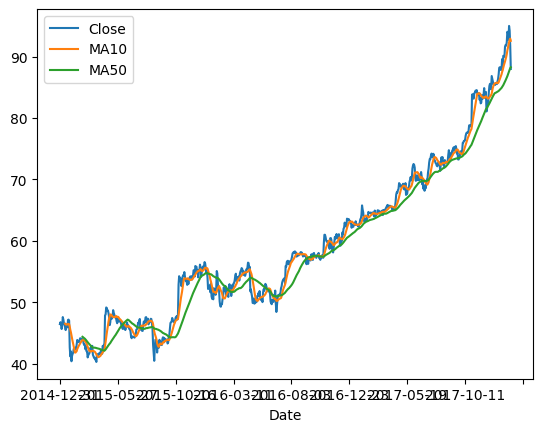

In [94]:
microsoft[['Close', 'MA10', 'MA50']].plot(legend=True)

In [95]:
# Own 1 share if profitable based off fast signal > slow signal strategy
microsoft['Shares'] = [1 if microsoft.loc[date, 'MA10'] > microsoft.loc[date, 'MA50']
                       else 0
                       for date in microsoft.index]

# microsoft[['Close', 'Shares']].plot()

In [96]:
microsoft['Next Close'] = microsoft['Close'].shift(-1)
microsoft[['Close', 'Next Close']]

,Close,Next Close
Date,,
2014-12-31,46.450001,46.759998
2015-01-02,46.759998,46.330002
2015-01-05,46.330002,45.650002
2015-01-06,45.650002,46.230000
2015-01-07,46.230000,47.590000
...,...,...
2018-01-30,92.739998,95.010002
2018-01-31,95.010002,94.260002
2018-02-01,94.260002,91.779999


In [97]:
microsoft['Daily Return'] = [microsoft.loc[today, 'Next Close'] - microsoft.loc[today, 'Close']
                       if microsoft.loc[today, 'Shares'] == 1
                       else 0
                       for today in microsoft.index]

microsoft[['Close', 'Shares', 'Daily Return']]

,Close,Shares,Daily Return
Date,,,
2014-12-31,46.450001,0,0.000000
2015-01-02,46.759998,0,0.000000
2015-01-05,46.330002,0,0.000000
2015-01-06,45.650002,0,0.000000
2015-01-07,46.230000,0,0.000000
...,...,...,...
2018-01-30,92.739998,1,2.270004
2018-01-31,95.010002,1,-0.750000
2018-02-01,94.260002,1,-2.480003


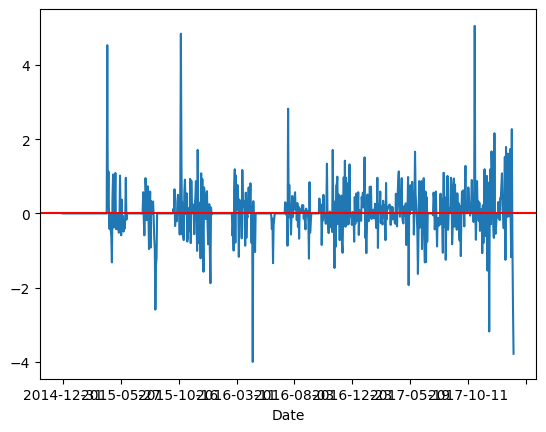

In [98]:
microsoft['Daily Return'].plot()
plt.axhline(y=0, color='red')

In [99]:
microsoft['Cumulative Return'] = microsoft['Daily Return'].cumsum()

microsoft[['Shares', 'Daily Return', 'Cumulative Return']].tail()

,Shares,Daily Return,Cumulative Return
Date,,,
2018-01-30,1,2.270004,31.229996
2018-01-31,1,-0.750000,30.479996
2018-02-01,1,-2.480003,27.999993
2018-02-02,1,-3.779999,24.219994
2018-02-05,1,NaN,NaN


In [100]:
microsoft['Last Close'] = microsoft['Close'].shift(1)
microsoft['Change'] = microsoft['Close'] - microsoft['Last Close']
microsoft['Cumulative Change'] = microsoft['Change'].cumsum()
microsoft[['Close', 'Change', 'Cumulative Change']]

,Close,Change,Cumulative Change
Date,,,
2014-12-31,46.450001,NaN,NaN
2015-01-02,46.759998,0.309997,0.309997
2015-01-05,46.330002,-0.429996,-0.119999
2015-01-06,45.650002,-0.680000,-0.799999
2015-01-07,46.230000,0.579998,-0.220001
...,...,...,...
2018-01-30,92.739998,-1.180000,46.289997
2018-01-31,95.010002,2.270004,48.560001
2018-02-01,94.260002,-0.750000,47.810001


Bought in at 46.450001 and had a return of 24.219994000000007 with current strategy


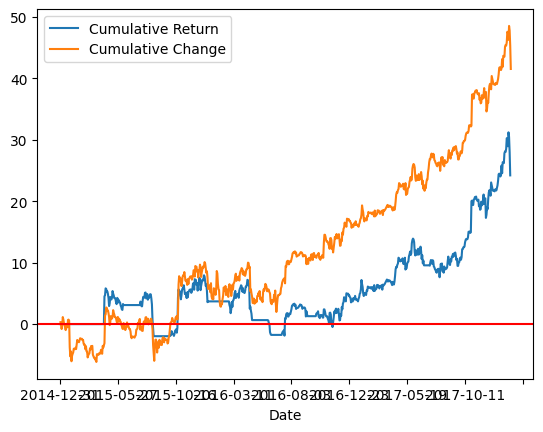

In [101]:
buy_price = microsoft.loc[microsoft.index[0], 'Close']
total_return = microsoft.loc[microsoft.index[-2], 'Cumulative Return']
print('Bought in at', buy_price, 'and had a return of', total_return, 'with current strategy')
microsoft[['Cumulative Return', 'Cumulative Change']].plot()
plt.axhline(y=0, color='red')